In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create a model class
class model(nn.Module):
    def __init__(self,in_features=4,h1=8,h2=8,out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)# input layer
        self.fc2 = nn.Linear(h1,h2)# hidden layer
        self.out = nn.Linear(h2,out_features)# output layer
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [3]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = model()

# training

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#data
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [6]:
# we have to change last coloumn number
my_df["variety"]=my_df["variety"].map({'Setosa':0,'Versicolor':1,'Virginica':2})
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
#train
X = my_df.drop('variety',axis=1).values# features
y = my_df['variety'].values# target
X,y


(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#train split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [10]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [11]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)#model.parameter will give a flow of parameters to optimizer

In [43]:
epochs = 100
losses=[]
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred,y_train)
    losses.append(loss.detach().numpy())
    if i%10==0:
        print(f'epoch {i} and loss is: {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 0 and loss is: 8.376113692065701e-05
epoch 10 and loss is: 8.291364065371454e-05
epoch 20 and loss is: 8.207948849303648e-05
epoch 30 and loss is: 8.124702435452491e-05
epoch 40 and loss is: 8.043744310270995e-05
epoch 50 and loss is: 7.963147072587162e-05
epoch 60 and loss is: 7.883404032327235e-05
epoch 70 and loss is: 7.805213681422174e-05
epoch 80 and loss is: 7.727943011559546e-05
epoch 90 and loss is: 7.652612839592621e-05


[array(8.376114e-05, dtype=float32), array(8.367295e-05, dtype=float32), array(8.359031e-05, dtype=float32), array(8.350604e-05, dtype=float32), array(8.342861e-05, dtype=float32), array(8.333828e-05, dtype=float32), array(8.3258245e-05, dtype=float32), array(8.316564e-05, dtype=float32), array(8.3086765e-05, dtype=float32), array(8.299329e-05, dtype=float32), array(8.291364e-05, dtype=float32), array(8.2823775e-05, dtype=float32), array(8.274196e-05, dtype=float32), array(8.2658626e-05, dtype=float32), array(8.257304e-05, dtype=float32), array(8.248988e-05, dtype=float32), array(8.240705e-05, dtype=float32), array(8.232389e-05, dtype=float32), array(8.223937e-05, dtype=float32), array(8.2157065e-05, dtype=float32), array(8.207949e-05, dtype=float32), array(8.199413e-05, dtype=float32), array(8.191519e-05, dtype=float32), array(8.182256e-05, dtype=float32), array(8.1745566e-05, dtype=float32), array(8.165905e-05, dtype=float32), array(8.158144e-05, dtype=float32), array(8.149397e-05, d

Text(0.5, 0, 'Epoch')

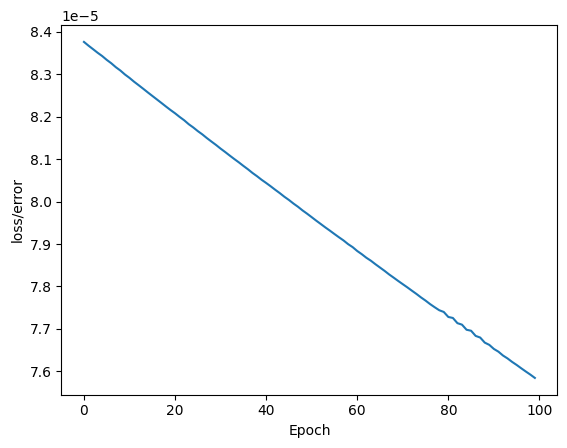

In [44]:
# Graph 
print(losses)
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')
     